# Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Get & unzip data

In [2]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2021-02-08 10:40:50--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Résolution de files.grouplens.org (files.grouplens.org)… 128.101.65.152
Connexion à files.grouplens.org (files.grouplens.org)|128.101.65.152|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 978202 (955K) [application/zip]
Enregistre : «ml-latest-small.zip.2»

ml-latest-small.zip 100%[===================>] 955,28K  1,23MB/s    ds 0,8s    

2021-02-08 10:40:51 (1,23 MB/s) - «ml-latest-small.zip.2» enregistré [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


#  Creat Dataframe

In [2]:
csv_file=pd.read_csv("ml-latest-small/ratings.csv")
utility_matrix=csv_file.pivot(index='movieId', columns='userId', values='rating').fillna(0.0)
utility_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create utility matrix & replace unratings by zeros

In [3]:
R = utility_matrix.to_numpy()
print(R.shape)
print(R)

(9724, 610)
[[4.  0.  0.  ... 2.5 3.  5. ]
 [0.  0.  0.  ... 2.  0.  0. ]
 [4.  0.  0.  ... 2.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


# SVD classe

In [4]:
class SVD():
    def __init__(self, M):
        self.M = M
        
    def computeSVD(self,M):
        U, S, VT = np.linalg.svd(self.M, full_matrices=False)
        s=np.diag(S)
        return U, S, VT, s
        
    def plot_singular_values(self,s):
        plt.semilogy(np.diagonal(s))
        plt.title('plot Singular Values')
        plt.show()
        
    def rank_S(self,S):
        print("rank:")
        return len(S)

# SVD Analysis

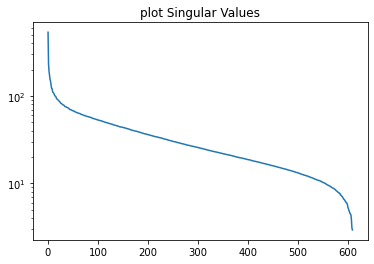

singular values list: 
 [534.41989777 231.23661142 191.1508762  170.42250831 154.552948
 147.33575651 135.65556768 122.66302989 121.44217651 113.11144323
 109.60313933 107.93266172 105.97376877 102.05675293  99.87323589
  99.28999246  97.11713355  93.40879296  92.32408574  90.97607986
  90.42515264  88.83466993  87.29627026  86.05702164  85.15393734
  83.04476272  82.40743887  81.73690785  80.86997674  79.52408732
  79.16948319  78.84651534  78.00723454  76.71225804  75.6272454
  75.40667214  74.96494138  74.29201322  74.05266585  73.45188037
  73.2246949   72.46953282  71.70985332  70.20660519  70.02143448
  69.93495369  69.50676339  69.07855191  68.43455046  67.8676482
  67.49922664  67.48404012  67.06467382  66.58800288  66.0811711
  65.46149276  64.93460662  64.84974658  64.3412403   63.92922187
  63.80270853  63.6549702   63.21158802  63.02672434  62.8347854
  62.30489869  61.71605686  61.54464024  61.24327624  60.80532105
  60.53737166  60.20111326  59.93380272  59.77707611  59.3

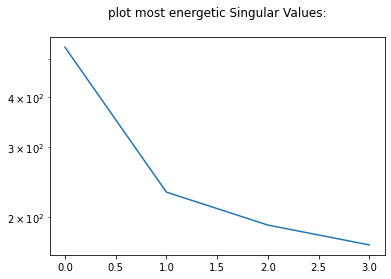

In [299]:
svd=SVD(R)
U, S, VT, s=svd.computeSVD(R)
svd.plot_singular_values(s)

print("singular values list: \n",S,"\n")

#-------------------------------------------------------

# Analyse energy of singular values :

tot_energy=0
for i in S: 
    tot_energy+=pow(i,2)
print("Total energy of singular values",tot_energy,"\n")

i=0
sigma=[]
energy=0
energy_threshold=0.3*tot_energy
while energy<energy_threshold:
    sigma.append(S[i])
    energy+=pow(S[i],2)
    i+=1
    
print("Most energetic singular values having 80% of total energy:")
print((sigma),"\n")
print("Energy =",energy,"\n")
print("Energy ratio",energy/tot_energy)



plt.semilogy(sigma)
plt.title('plot most energetic Singular Values:\n')
plt.show()

# getting non zero values from the original matrix

In [301]:
#getting non zero values from the original matrix:

len_items, len_users = R.shape
dec={}
i_j_R= [ 
            (i, j)
            for i in range(len_items)
            for j in range(len_users)
            if R[i, j] != 0
        ]

list_i=[]
list_j=[]
#dec_x={}
for i,j in i_j_R:
    if i not in list_i:
        list_i.append(i)
    if j not in list_j:
        list_j.append(j)
        
print(len(list_i)*len(list_j))
print((R[i_j_R[3]]))
print(len(S))
print(len_items)
print(len_users)


5931640
2.5
610
9724
610


# SGD & RMSE functions

In [190]:
def grad_pT_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda):
    grad_pT=np.zeros((k,len_users))

    for x,i in zip(list_j,list_i):
        grad_pT[:,x]+=2*(Q[i,:].dot(pT[:,x])-R[i,x])*Q[i,:] + 2*lamda*pT[:,x]
    
    grad_pT=grad_pT/(len_users*k)

    return grad_pT
      
    
def grad_Q_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda):
    grad_Q=np.zeros((len_items,k))
    
    for x,i in zip(list_j,list_i):
          grad_Q[i,:]+=2*(Q[i,:].dot(pT[:,x])-R[i,x])*pT[:,x] + 2*lamda*Q[i,:]
    
    grad_Q=grad_Q/(len_items*k)
    
    return grad_Q


    
def gradient_descent(R,len_items,len_users,list_j,list_i,k,learning_rate,iteration,lamda,lamda2):
    Q = np.random.rand(len_items,k)*2
    pT = np.random.rand(k,len_users)*2
    
    for _ in range(iteration):
        pT=pT-learning_rate*grad_pT_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda)
        Q=Q-learning_rate*grad_Q_func(R,Q,pT,list_j,list_i,k,len_items,len_users,lamda2)
    return Q,pT

def RMSE(R, QpT):
    rmse=0
    for i,j in i_j_R:
        rmse+=np.power(QpT[i,j]-R[i,j],2)
    rmse_=np.sqrt(rmse/len(i_j_R))
    
    return rmse_

# Adjusting parameters and running SGD & RMSE functions

In [290]:
iteration=100
lamda=7.5
lamda2=8
learning_rate=0.75
k=5

Q,pT=gradient_descent(R,len_items,len_users,list_j,list_i,k,learning_rate,iteration,lamda,lamda2)
QpT=np.round(Q.dot(pT))
rmse_err=RMSE(R,QpT)
print(rmse_err)

1.7525970596938438


In [291]:
print(QpT)

[[3. 3. 2. ... 2. 1. 1.]
 [4. 4. 3. ... 2. 1. 5.]
 [5. 4. 4. ... 3. 2. 4.]
 ...
 [4. 3. 3. ... 3. 1. 4.]
 [4. 2. 2. ... 2. 1. 4.]
 [3. 3. 3. ... 3. 1. 2.]]


In [212]:
print(R)

[[4.  0.  0.  ... 2.5 3.  5. ]
 [0.  0.  0.  ... 2.  0.  0. ]
 [4.  0.  0.  ... 2.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [302]:
'''for i,j in i_j_R:
    print(QpT[i,j],R[i,j],"\n")'''

'for i,j in i_j_R:\n    print(QpT[i,j],R[i,j],"\n")'